In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

In [139]:
pwd

'/home/ec2-user/SageMaker'

In [140]:
# Read the .csv into a pandas dataframe from S3 bucket
engine = pd.read_csv('s3://togunniyi-bstn-bucket29/recommendationengine.csv')

In [252]:
# Display the first 29 rows of the dataset
engine.head(29)

,User_ID,Product_ID,User_Rating,Rating_timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
5,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
6,A2TY0BTJOTENPG,0511189877,5.0,1395878400
7,A34ATBPOK6HCHY,0511189877,5.0,1395532800
8,A89DO69P0XZ27,0511189877,5.0,1395446400
9,AZYNQZ94U6VDB,0511189877,5.0,1401321600


# Capstone Project Part 1: Exploratory Data Analysis

In [142]:
# Check the number of rows and columns in the dataframe
engine.shape

(599999, 4)

In [143]:
# Rename columns of the dataframe
engine.rename(columns = {'AKM1MP6P0OYPR':'User_ID', '0132793040':'Product_ID',\
                             '5.0':'User_Rating','1365811200':'Rating_timestamp'},inplace = True)

In [144]:
# Check the first 3 rows of the dataframe to make sure that the column name have been changed
engine.head(3)

,User_ID,Product_ID,User_Rating,Rating_timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200


In [145]:
# 5 point summary statistics for the User_Rating column
engine.describe()['User_Rating'].T 

count    599999.000000
mean          4.022373
std           1.372565
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: User_Rating, dtype: float64

In [146]:
# Overview of the dataframe including data types
engine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599999 entries, 0 to 599998
Data columns (total 4 columns):
User_ID             599999 non-null object
Product_ID          599999 non-null object
User_Rating         599999 non-null float64
Rating_timestamp    599999 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 18.3+ MB


- Dataset is clean and there are no null values to fill

In [147]:
# Double checking for null values.
#Display the number of null values in each column as a percentage
round((engine.isna().sum()/len(engine))* 100,1)

User_ID             0.0
Product_ID          0.0
User_Rating         0.0
Rating_timestamp    0.0
dtype: float64

In [148]:
# Check the dataset for duplicates.If present, drop duplicate rows.
engine.drop_duplicates(keep='first', inplace=True)

In [149]:
# Check the number of rows and columns in the dataframe after checking for duplicate rows
engine.shape

(599999, 4)

- There are no duplicate rows in the dataframe

In [150]:
#Find the number of unique users in the dataset
engine['User_ID'].nunique()

496908

In [151]:
# Find the number of different products in the dataset
engine['Product_ID'].nunique()

58766

In [152]:
# Find the number of unique time stamps
engine['Rating_timestamp'].nunique()

5489

In [153]:
# Find the maximum rating of a product by a particular user
engine['User_Rating'].max()

5.0

In [154]:
# Find the minimum rating of a product by a user 
engine['User_Rating'].min()

1.0

### I did install plotly express for my jupyterlab notebook online, but it did not render the plotly chart after it was done installing. If it did, the following are the steps I would have used to plot my horizontal bar graph. I also made sure to test the code before launching my notebook instance on AWS.

In [155]:
# Create a copy of the dataframe
plotlyy = engine.copy()

In [156]:
# Check the first 3 rows of the new dataframe
plotlyy.head(3)

,User_ID,Product_ID,User_Rating,Rating_timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200


In [157]:
# Create a new dataframe that counts the number of each product and sorts the quantities in a descending order
plotly_charts= pd.DataFrame(plotlyy['Product_ID'].value_counts().sort_values(ascending=False).reset_index())

In [158]:
# Check the first 3 rows of the dataframe
plotly_charts.head(3)

,index,Product_ID
0,B00007E7JU,3523
1,B00GTGETFG,2667
2,B00007M1TZ,2608


In [159]:
# Rename the columns of the dataframe
plotly_charts.columns = ['Product_ID','Quantity_of_each_product']

In [160]:
# Check the first 7 rows of the dataframe
plotly_charts.head(7)

,Product_ID,Quantity_of_each_product
0,B00007E7JU,3523
1,B00GTGETFG,2667
2,B00007M1TZ,2608
3,B00004ZCJE,2547
4,B00001P4ZH,2075
5,B00009R6TA,1978
6,B00007E7C8,1962


In [161]:
# Create a dataframe by taking the first 10 rows of the previous dataframe
# and sort in an ascending order using the 'Quantity_of_each_product' column

plotly_express=pd.DataFrame(plotly_charts.iloc[0:11,:].sort_values(by='Quantity_of_each_product'))

In [162]:
# Display the dataframe
plotly_express

,Product_ID,Quantity_of_each_product
10,B000065BP9,1714
9,B00007EDZG,1735
8,B00EF1OGOG,1812
7,B00007KDVI,1816
6,B00007E7C8,1962
5,B00009R6TA,1978
4,B00001P4ZH,2075
3,B00004ZCJE,2547
2,B00007M1TZ,2608
1,B00GTGETFG,2667


#### I ran the command below when I was having problems having the horizontal bar graph rendered after installing it via the terminal in the notebook instance (Jupyterlab) in AWS

In [164]:
!pip install plotly_express

mlxtend 0.17.2 requires joblib>=0.13.2, which is not installed.
mlxtend 0.17.2 has requirement numpy>=1.16.2, but you'll have numpy 1.14.6 which is incompatible.
mlxtend 0.17.2 has requirement scipy>=1.2.1, but you'll have scipy 1.1.0 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### Code to plot horizontal bar graphs to show the top 10 electronic products sold (PLOTLY EXPRESS)

In [ ]:
# Plot a horizontal bar graph of the top 10 electronic products in the dataset

fig = px.bar(plotly_express, x="Quantity_of_each_product", y='Product_ID', orientation='h')
fig.update_layout(xaxis_showgrid=False, yaxis_showgrid=False)
fig.update_layout(title_text='Product ID "B00007E7JU" is the most popular electronic product on Amazon')
fig.show()

### Instead of the above, I plotted the horizontal bar graph based on the one I had previously using Matplot Lib.

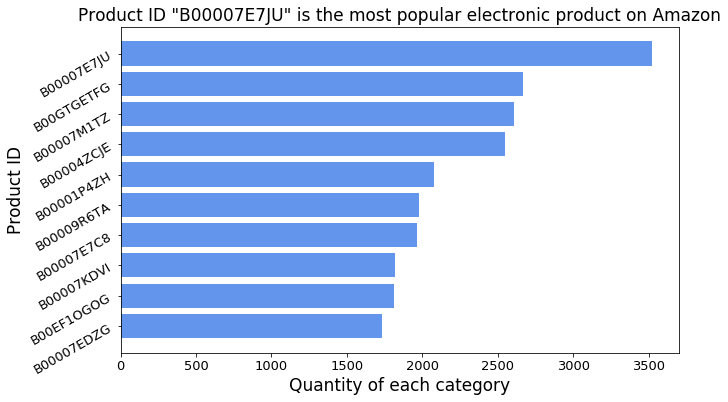

In [165]:
# Plot a horizontal bar chart to find the top 10 most popular products 
plt.figure(figsize=(10,6))
sorted_counts = engine['Product_ID'].value_counts().head(10).sort_values()
plt.barh(sorted_counts.index, sorted_counts.values, color ='cornflowerblue')
plt.title('Product ID "B00007E7JU" is the most popular electronic product on Amazon', fontsize=17)
plt.xlabel('Quantity of each category', fontsize = 17)
plt.xticks(fontsize = 13)
plt.ylabel('Product ID', fontsize = 17)
plt.yticks(rotation=30, fontsize = 13)
plt.show()

### Same scenario above. I could not get Jupyter lab notebook to render my plotly express bar graph for the user ratings so I used the one I previously had in Matplot lib. The steps below however do show how I went about getting the tables ready to plot the user ratings bar chart.

In [83]:
# Count the number of each type of user ratings and display the values in an ascending order
users_ratings = engine['User_Rating'].value_counts().sort_values().reset_index()

In [84]:
# Display result
users_ratings

,index,User_Rating
0,2.0,34193
1,3.0,48062
2,1.0,67996
3,4.0,115888
4,5.0,333860


In [85]:
# Rename the columns 
users_ratings.columns = ['User_Rating','Rating_Total']

In [86]:
# Check to make sure that the column names have been adjusted
users_ratings

,User_Rating,Rating_Total
0,2.0,34193
1,3.0,48062
2,1.0,67996
3,4.0,115888
4,5.0,333860


In [87]:
# Put the previous results into a dataframe
ploty_user_ratings=pd.DataFrame(users_ratings)

### Code to run to create my Ploty express bar chart showing the count of different user ratings

In [ ]:
# Create bar graph that shows the count of each type of user rating (i.e. User_Rating from the dataset)
fig = px.bar(ploty_user_ratings, x="User_Rating", y='Rating_Total', orientation='v')
fig.update_layout(xaxis_showgrid=False, yaxis_showgrid=False)
fig.update_layout(title_text='The most common user rating is 5')
fig.update_traces(marker_color='orange')
fig.show()

### Same bar graph above is provided using Matplotlib

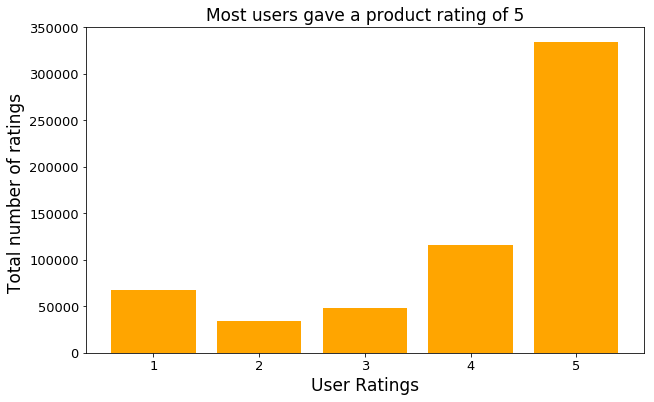

In [166]:
# Plot a bar chart of the user ratings 
plt.figure(figsize=(10,6))
sorted_counts = engine['User_Rating'].value_counts().head(10).sort_values()
plt.bar(sorted_counts.index, sorted_counts.values, color ='orange')
plt.title('Most users gave a product rating of 5', fontsize=17)
plt.xlabel('User Ratings', fontsize = 17)
plt.xticks(fontsize = 13)
plt.ylabel('Total number of ratings ', fontsize = 17)
plt.yticks(fontsize = 13)
plt.show()

In [19]:
# Display the bottom 30 products
engine['Product_ID'].value_counts().tail(30)

B00HAFDFDM    1
B00JMPQM92    1
B00KV3B66I    1
B00KYK1CKI    1
B00KB49P1A    1
B00J1TLTWE    1
B00005O7FU    1
B00K9553YE    1
B00GISZN6E    1
B00008N6S7    1
B00FGP1H10    1
B00EK5VD98    1
B00ITP2DOO    1
B00005LD4L    1
B00GUT3OQM    1
B00G0PM584    1
B00JPMDRGS    1
B00009R96Y    1
B00EDTU176    1
B00JMAWDLS    1
B00ET21WNO    1
B00FF1BTYK    1
B00006JPHS    1
B00L4OYGOC    1
B00FPQ3BUA    1
B00EDM1PXC    1
B00G48EG0C    1
B00GNKSHV0    1
B00JRFLGFM    1
B00GLH19BU    1
Name: Product_ID, dtype: int64

## End of exploratory data analysis (EDA) for my capstone project

# Capstone Project Part 2: Modeling

## Part 2 of my capstone project involves using a Market Basket Analysis approach to build a recommendation system

## Market Basket Analysis

In [211]:
# Make a copy of the training set dataframe for using in implementing a Market basket analysis.
basket= engine.copy()

In [212]:
# Check the number of rows and columns in the dataframe
basket.shape

(599999, 4)

In [213]:
# Check the first 3 rows of the dataframe
basket.head(3)

,User_ID,Product_ID,User_Rating,Rating_timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200


- Due to the large size of the data set, and too many issues with memory error, I will use only 40,000 rows of my dataset moving forward to build a contigency table prior to fitting the Apriori algorithm and then association tables.

In [217]:
# Create a slice of the dataframe that contains 40,000 rows
cart = basket.iloc[60000:100000,:]

In [218]:
# Check the first 3 rows of the dataframe
cart.head(3)

,User_ID,Product_ID,User_Rating,Rating_timestamp
60000,A1HCQ95EXAD08E,B00004WHV7,1.0,983577600
60001,A2WVJ0KW0QKH0P,B00004WHV7,2.0,974678400
60002,A1N71AF4CX5TFD,B00004WHV7,5.0,983232000


In [219]:
# Reset the index of the dataframe and show only the first 7 rows
cart.reset_index(drop=True).head(7)

,User_ID,Product_ID,User_Rating,Rating_timestamp
0,A1HCQ95EXAD08E,B00004WHV7,1.0,983577600
1,A2WVJ0KW0QKH0P,B00004WHV7,2.0,974678400
2,A1N71AF4CX5TFD,B00004WHV7,5.0,983232000
3,A3W112102BC6BG,B00004WHV7,3.0,1012521600
4,A3IA7MDBXPM8MM,B00004WHV7,5.0,1017619200
5,A1RQZ5WIFQS4ME,B00004WHV7,5.0,1003795200
6,AOBTSAKTJLDYX,B00004WHV7,1.0,978393600


In [220]:
# Each basket is a list of products purchased a unique user
online_basket = cart.groupby(['User_ID']).apply(lambda x: list(x['Product_ID']))

In [221]:
# Display the dataframe
online_basket

User_ID
A03279253KKB83JP34CU                             [B00004ZCAT]
A0478499AHWR7GZCCWR1                             [B00004ZCKV]
A05039072BTS8XOPJKBXB                            [B00004Z6N6]
A06127456OQRZ2TKT7EY                             [B00004Z0C7]
A07324873GQMRSBW9534Y                            [B0000510ZO]
A0815906MFVDTIFHGRQR                             [B00004YKUB]
A09271781JOQU3Y4IT8QB                            [B0000510IA]
A0957734330PLRZT884UU                            [B00004XOM3]
A09600262CLBSRBGU2VTY                            [B00004ZCJE]
A09778421NQ9P4ZZ7HFA                             [B0000510T7]
A1004HHMSDY5IP                                   [B00005K2EX]
A100MYX0NHJV2I                                   [B00005ABE5]
A100UD67AHFODS                                   [B00004Z5M1]
A101243KMUIJC0                                   [B00004Z0C7]
A1016Q5UDME15Z                       [B00004WLJ4, B0000513OF]
A101C99CG8EFUH                                   [B0000510TZ]


In [222]:
from mlxtend.preprocessing import TransactionEncoder

# Ignore warning about SparseDataFrame deprecation
from warnings import filterwarnings
filterwarnings('ignore')

- The transaction encoder will be applied to the online baskets in order to create a sparse transaction format dataframe.

In [223]:
# Instantiate a transaction encoder
transaction_encoder = TransactionEncoder()

# Fit the encoder to the "baskets" object and transform it
encoded_matrix = transaction_encoder.fit(online_basket).transform(online_basket, sparse=True)

In [224]:
# Create a sparse dataframe from the sparse matridx from previous step
encoded_basket = pd.SparseDataFrame(encoded_matrix, columns=transaction_encoder.columns_, default_fill_value=0)

In [225]:
# Show the sparse dataframe
encoded_basket

,B00004WHV7,B00004WHWD,B00004WI43,B00004WIM9,B00004WIMB,B00004WIMF,B00004WIMM,B00004WIMW,B00004WIN3,B00004WIN5,...,B00005K2R1,B00005K2S8,B00005K2SA,B00005K2SC,B00005K3AN,B00005K3KD,B00005K3KT,B00005K3LZ,B00005K47N,B00005K47X
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- The one hot encoded sparse Dataframe above has a total of 37361 rows and 2779 columns. Each **column** header represents an item, while each **row** represents a basket.

In [226]:
# Find the sum of each basket 
encoded_basket.sum(axis=0)

B00004WHV7     10
B00004WHWD      2
B00004WI43      9
B00004WIM9      1
B00004WIMB      1
B00004WIMF      1
B00004WIMM      1
B00004WIMW     68
B00004WIN3      1
B00004WIN5      3
B00004WINU      3
B00004WJJZ      4
B00004WJO4      5
B00004WKU1      3
B00004WLHH      2
B00004WLJ2     58
B00004WLJ4     36
B00004WLJ5     28
B00004WLJ6      3
B00004WLJ7     31
B00004WLJ8     20
B00004WLJ9     68
B00004WLL8      2
B00004WLP7      1
B00004WLQK      1
B00004WLQX      2
B00004WLQY     36
B00004WYQR      5
B00004WYQU      2
B00004WZJM      2
             ... 
B00005JIM3      1
B00005JIMF      2
B00005JIMH      4
B00005JIML      1
B00005JJEN      6
B00005JJEO     20
B00005JJES      2
B00005JJRF      2
B00005JJRJ      2
B00005JJRK      1
B00005JS8P      4
B00005JS8S      2
B00005JTB9      3
B00005JTVV      3
B00005JTW1      3
B00005JXI6      2
B00005K2EX      2
B00005K2Q3      2
B00005K2QY      2
B00005K2R0     35
B00005K2R1      1
B00005K2S8      3
B00005K2SA      3
B00005K2SC      4
B00005K3AN

- Prior to using the `Apriori` algorithm to determine **association rules**, a contigency table is created to visualize the top 10 items based on `support`

In [227]:
# Select only the top 10 items(products) and assign them to a variable (top_10_items) 
top_10_items = encoded_basket.sum(axis=0).nlargest(10)

In [228]:
# Check for the top_10_items
top_10_items

B00004ZCJE    2547
B00005ATMB    1015
B00004Z5M1     815
B00005ARK3     795
B00004ZC8Y     720
B00005ATMI     597
B00005A1K1     522
B000051ZOA     410
B00005K47X     390
B000058AKE     363
dtype: int64

In [229]:
# Filter the encoded dataframe (i.e. encoded_basket) to obtain only the top 10 items
top_10_dataframe = encoded_basket[top_10_items.index]

# Check the dataframe
top_10_dataframe

,B00004ZCJE,B00005ATMB,B00004Z5M1,B00005ARK3,B00004ZC8Y,B00005ATMI,B00005A1K1,B000051ZOA,B00005K47X,B000058AKE
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0


In [230]:
# Create a 10 * 10 contigency table
# This is made possible via matrix transposition and multiplication
contigency_table = top_10_dataframe.T.dot(top_10_dataframe.astype(int))

# Check the contigency table
contigency_table

,B00004ZCJE,B00005ATMB,B00004Z5M1,B00005ARK3,B00004ZC8Y,B00005ATMI,B00005A1K1,B000051ZOA,B00005K47X,B000058AKE
B00004ZCJE,2547,0,6,0,97,2,1,1,18,0
B00005ATMB,0,1015,2,0,0,11,0,0,0,0
B00004Z5M1,6,2,815,0,0,1,0,1,0,0
B00005ARK3,0,0,0,795,0,1,0,0,0,0
B00004ZC8Y,97,0,0,0,720,0,0,1,4,0
B00005ATMI,2,11,1,1,0,597,0,0,1,0
B00005A1K1,1,0,0,0,0,0,522,0,0,0
B000051ZOA,1,0,1,0,1,0,0,410,0,1
B00005K47X,18,0,0,0,4,1,0,0,390,0
B000058AKE,0,0,0,0,0,0,0,1,0,363


In [231]:
# Divide each count by total number of baskets to find support
Support_table = contigency_table/len(online_basket)

In [232]:
# Check the Support table
Support_table

,B00004ZCJE,B00005ATMB,B00004Z5M1,B00005ARK3,B00004ZC8Y,B00005ATMI,B00005A1K1,B000051ZOA,B00005K47X,B000058AKE
B00004ZCJE,0.068173,0.000000,0.000161,0.000000,0.002596,0.000054,0.000027,0.000027,0.000482,0.000000
B00005ATMB,0.000000,0.027167,0.000054,0.000000,0.000000,0.000294,0.000000,0.000000,0.000000,0.000000
B00004Z5M1,0.000161,0.000054,0.021814,0.000000,0.000000,0.000027,0.000000,0.000027,0.000000,0.000000
B00005ARK3,0.000000,0.000000,0.000000,0.021279,0.000000,0.000027,0.000000,0.000000,0.000000,0.000000
B00004ZC8Y,0.002596,0.000000,0.000000,0.000000,0.019271,0.000000,0.000000,0.000027,0.000107,0.000000
B00005ATMI,0.000054,0.000294,0.000027,0.000027,0.000000,0.015979,0.000000,0.000000,0.000027,0.000000
B00005A1K1,0.000027,0.000000,0.000000,0.000000,0.000000,0.000000,0.013972,0.000000,0.000000,0.000000
B000051ZOA,0.000027,0.000000,0.000027,0.000000,0.000027,0.000000,0.000000,0.010974,0.000000,0.000027
B00005K47X,0.000482,0.000000,0.000000,0.000000,0.000107,0.000027,0.000000,0.000000,0.010439,0.000000
B000058AKE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000027,0.000000,0.009716


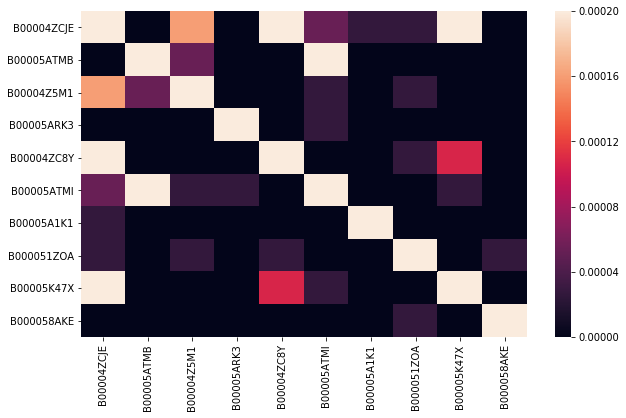

In [272]:
# Heatmap of the 10x10 dataframe of supports above
plt.figure(figsize=(10,6))
sns.heatmap(Support_table, vmax=0.0002)
plt.show()

- The heatmap shows that there are products that do appear together frequently in baskets. An example is **Product_ID** `B00004ZC8Y` which seems to be frequently bought together with **Product_ID** `B00004ZCJE`. The product that corresponds to the AMAZON (ASIN-Amazon Standard Identification Number) of `B00004ZC8Y` is a Tiffen 46mm Circular Polarizer, while the product name for the ASIN (`B00004ZCJE`) is a Tiffen 46mm Digital camera UV Protection Filter.

- Prior to fitting the `Apriori` algorithm to the dataset, a histogram is plotted below to estimate the ideal value for minimum 
`support`. A vertical line representing the 99th percentile.

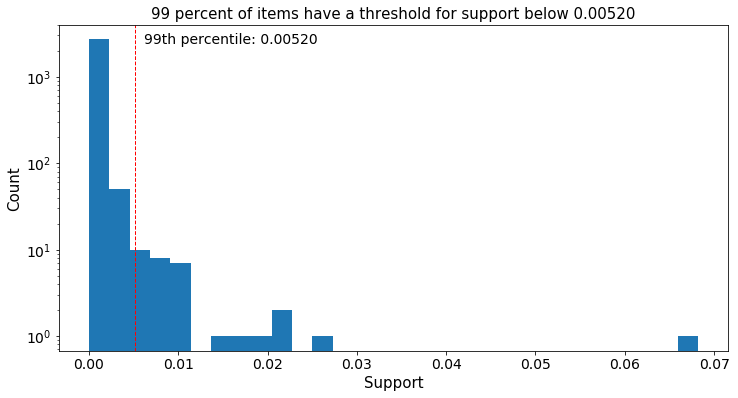

In [234]:
# Create a histogram to view the distribution of support for the items in order to help determine minimum support.
# (prior to fitting the Apriori algorithm)


basket_support = encoded_basket.sum(axis=0)/len(online_basket)
percentile_99 = np.percentile(basket_support,99,axis=0)

# Look at the distribution of supports
plt.figure(figsize=(12,6))
plt.hist(basket_support, bins=30)

plt.title('99 percent of items have a threshold for support below 0.00520', fontsize=15)
plt.xlabel('Support', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(percentile_99, color='r', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(percentile_99,max_ylim*0.6, '  99th percentile: {:.5f}'.format(percentile_99), fontsize=14)
plt.show()

- Based on the histogram plot, 99 % of eletronic products do have a a threshold for `support` under 0.0052. I am going to use a minimum support value below this threshold so as to ensure that at least 99% of the dataset is included.

In [201]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [235]:
# Create a dataframe with itemsets
apriori_dataframe = apriori(encoded_basket, min_support=0.0002, use_colnames=True,max_len=3)

In [236]:
# Check the dataframe
apriori_dataframe

,support,itemsets
0,0.000268,(B00004WHV7)
1,0.000241,(B00004WI43)
2,0.001820,(B00004WIMW)
3,0.001552,(B00004WLJ2)
4,0.000964,(B00004WLJ4)
5,0.000749,(B00004WLJ5)
6,0.000830,(B00004WLJ7)
7,0.000535,(B00004WLJ8)
8,0.001820,(B00004WLJ9)
9,0.000964,(B00004WLQY)


### Association rules are determined below after fitting the **`Apriori`** algorithm to the sparse Dataframe

In [237]:
# Association rules are determined for the itemsets using LIFT with a minimum threshold of 1
basket_rules=association_rules(apriori_dataframe,metric='lift',min_threshold=1)

In [238]:
# Show the dataframe for the association rules
basket_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(B000053HH5),(B00004XOM3),0.009288,0.007949,0.000321,0.034582,4.350246,0.000247,1.027587
1,(B00004XOM3),(B000053HH5),0.007949,0.009288,0.000321,0.040404,4.350246,0.000247,1.032426
2,(B000053HH5),(B00004YZQ8),0.009288,0.002596,0.000214,0.023055,8.879884,0.000190,1.020941
3,(B00004YZQ8),(B000053HH5),0.002596,0.009288,0.000214,0.082474,8.879884,0.000190,1.079765
4,(B00004Z5D1),(B00004Z5VS),0.009207,0.002596,0.000375,0.040698,15.675318,0.000351,1.039718
5,(B00004Z5VS),(B00004Z5D1),0.002596,0.009207,0.000375,0.144330,15.675318,0.000351,1.157914
6,(B00004Z5D1),(B00004Z6XS),0.009207,0.003480,0.000241,0.026163,7.518985,0.000209,1.023293
7,(B00004Z6XS),(B00004Z5D1),0.003480,0.009207,0.000241,0.069231,7.518985,0.000209,1.064488
8,(B00004ZC9V),(B00004ZC8Y),0.005648,0.019271,0.000348,0.061611,3.197031,0.000239,1.045120
9,(B00004ZC8Y),(B00004ZC9V),0.019271,0.005648,0.000348,0.018056,3.197031,0.000239,1.012636


- The **most important rules** from the association rules table above are determined based on `Support`(how frequent the item(s) occur in a transaction) and `Lift`(measure of how much sales is driven by the relationship ). 

In [239]:
# Sort the association rules table (association_rules) above in a descending order using support and lift
final_basket =basket_rules.sort_values(['support','lift'],ascending = False)

In [240]:
# Display the 30 association rules in order of importance
final_basket

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,(B00004ZC8Y),(B00004ZCJE),0.019271,0.068173,0.002596,0.134722,1.976190,0.001283,1.076911
15,(B00004ZCJE),(B00004ZC8Y),0.068173,0.019271,0.002596,0.038084,1.976190,0.001283,1.019557
22,(B000056SSM),(B00005ARK3),0.008164,0.021279,0.001392,0.170492,8.012257,0.001218,1.179881
23,(B00005ARK3),(B000056SSM),0.021279,0.008164,0.001392,0.065409,8.012257,0.001218,1.061252
26,(B00005AW1H),(B00005ARK3),0.008137,0.021279,0.000857,0.105263,4.946839,0.000683,1.093865
27,(B00005ARK3),(B00005AW1H),0.021279,0.008137,0.000857,0.040252,4.946839,0.000683,1.033462
4,(B00004Z5D1),(B00004Z5VS),0.009207,0.002596,0.000375,0.040698,15.675318,0.000351,1.039718
5,(B00004Z5VS),(B00004Z5D1),0.002596,0.009207,0.000375,0.144330,15.675318,0.000351,1.157914
9,(B00004ZC8Y),(B00004ZC9V),0.019271,0.005648,0.000348,0.018056,3.197031,0.000239,1.012636
8,(B00004ZC9V),(B00004ZC8Y),0.005648,0.019271,0.000348,0.061611,3.197031,0.000239,1.045120


- Function provided below is a recommendation system that returns a list of up to 3 items (`consequents`) based on the basket `antecents` 

In [242]:
# Market Basket Analysis recommendation system

def basket_recommendation_system(basket, association_rules_dataframe):
    '''
    Function is used to recommend items to customers
    based on current items(products) in the basket.
    
    ------------Allowable inputs for a basket are strings. These include the following:
    - List of strings
    - Numpy array of strings
    - Frozenset of strings
    - Set of strings
    
    ------------Allowable input for a dataframe is an association rules dataframe.
    '''
    assert isinstance('basket',(str,list,set,frozenset,np.string_)),\
    'Input basket has to be a string, or a list/set/frozenset/Numpy array of string(s)'
    
    assert isinstance(association_rules_dataframe, pd.DataFrame),\
    ' Input dataframe has to be a dataframe of association rules'
    
    # Turn the input basket into a set
    basket_set = set(basket)
    
    # Filter the association rules dataframe to obtain rows whose antecedents match the set
    filtered_df = rules_dataframe[rules_dataframe['antecedents'] == basket_set]
    
    # Sort the filtered dataframe in place by support and lift in descending order
    filtered_df.sort_values(['support', 'lift'], ascending=False, inplace=True)
    
    # Set up an empty recommendation list
    recommendation_list = []

    # Loop over the consequents
    for consequent in filtered_df['consequents']:
    
        # We use a nested for loop here to access each element (item) in each frozenset (consequent)
        for item in consequent:
        
            # Append non-duplicate items to the recommendation list
            if item not in recommendation_list:
                recommendation_list.append(item)
    
    # If three or more recommendations were found, return a slice of the list containing the first three elements
    if len(recommendation_list) >= 3:
        return recommendation_list[:3]
    
    # If two recommendations were found, return the list
    elif len(recommendation_list) == 2:
        return recommendation_list

    # If only one recommendation was found, return the list
    elif len(recommendation_list) == 1:
        return recommendation_list
     # Do nothing (this returns None),if there are no recommendations
    else:
        pass

### END OF MARKET BASKET ANALYSIS

### The 30 `association rules` are further explored to visualize a product network with the purpose of determining expressive clusters in the dataset. 

### Create the dataframe that will be used as `Edge` for network analysis.

In [243]:
# Create a subset of the dataframe that contains only the antecedent and consequent columns
rule_objects = basket_rules[['antecedents', 'consequents']]

In [244]:
rule_objects

,antecedents,consequents
0,(B000053HH5),(B00004XOM3)
1,(B00004XOM3),(B000053HH5)
2,(B000053HH5),(B00004YZQ8)
3,(B00004YZQ8),(B000053HH5)
4,(B00004Z5D1),(B00004Z5VS)
5,(B00004Z5VS),(B00004Z5D1)
6,(B00004Z5D1),(B00004Z6XS)
7,(B00004Z6XS),(B00004Z5D1)
8,(B00004ZC9V),(B00004ZC8Y)
9,(B00004ZC8Y),(B00004ZC9V)


### The `Edge` for network analysis will be exported as `.csv` file into S3 bucket

In [246]:
# Create a copy of the dataframe
Edge = rule_objects.copy()

In [248]:
# Check the first 3 rows after copying the dataframe
Edge.head(3)

,antecedents,consequents
0,(B000053HH5),(B00004XOM3)
1,(B00004XOM3),(B000053HH5)
2,(B000053HH5),(B00004YZQ8)


In [293]:
# Export Edge dataframe as a .csv file into the S3 bucket
from io import StringIO
import boto3

bucket = 'togunniyi-bstn-bucket29' # already created on S3
csv_buffer = StringIO()
Edge.to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, 'Edge.csv').put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': '238EF6FD65EBC1C8',
  'HostId': 'tkoX7opdPBHbRTyyrd6AA0o3E8r5xHxJgpEDaNLwfxqBZV0/ON1rC+mO1ZLv3nYQZrKAzNyGf7w=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'tkoX7opdPBHbRTyyrd6AA0o3E8r5xHxJgpEDaNLwfxqBZV0/ON1rC+mO1ZLv3nYQZrKAzNyGf7w=',
   'x-amz-request-id': '238EF6FD65EBC1C8',
   'date': 'Sun, 29 Mar 2020 13:57:26 GMT',
   'etag': '"5e3609218d01596574d0899c7ada58c3"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"5e3609218d01596574d0899c7ada58c3"'}

### Create the dataframe that will be used as the `Node` for network analysis.

In [296]:
# Create a new dataframe that contains 1 colum with the antecedent and consequent columns stacked on top of each other
stack_columns=pd.DataFrame(rule_objects.stack().reset_index(drop=True))

In [297]:
# Check the dataframe
stack_columns

,0
0,(B000053HH5)
1,(B00004XOM3)
2,(B00004XOM3)
3,(B000053HH5)
4,(B000053HH5)
5,(B00004YZQ8)
6,(B00004YZQ8)
7,(B000053HH5)
8,(B00004Z5D1)
9,(B00004Z5VS)


In [298]:
# Change the name of the column from  "0" to "Node"
stack_columns.columns=["Node"]

In [299]:
# Check the first 3 rows to ensure that the change has been made
stack_columns.head(3)

,Node
0,(B000053HH5)
1,(B00004XOM3)
2,(B00004XOM3)


In [300]:
# Create a copy of the dataframe
copy_stack=stack_columns.copy()

In [309]:
# Check the number of rows and columns in the copy of the dataframe
copy_stack.shape

(60, 1)

In [301]:
# Check the dataset for duplicates.If present, drop duplicate rows.
stack_columns.drop_duplicates(keep='first', inplace=True)

In [302]:
stack_columns

,Node
0,(B000053HH5)
1,(B00004XOM3)
5,(B00004YZQ8)
8,(B00004Z5D1)
9,(B00004Z5VS)
13,(B00004Z6XS)
16,(B00004ZC9V)
17,(B00004ZC8Y)
21,(B00004ZCAT)
24,(B00004ZCB4)


In [303]:
# Reset the index of the dataframe
stacked_col= stack_columns.reset_index(drop=True)

In [304]:
# Display the dataframe after resetting its index
stacked_col

,Node
0,(B000053HH5)
1,(B00004XOM3)
2,(B00004YZQ8)
3,(B00004Z5D1)
4,(B00004Z5VS)
5,(B00004Z6XS)
6,(B00004ZC9V)
7,(B00004ZC8Y)
8,(B00004ZCAT)
9,(B00004ZCB4)


In [305]:
# Create a copy of the dataframe
Node= stacked_col.copy()

In [307]:
# Check to ensure that the new dataframe has been created
Node

,Node
0,(B000053HH5)
1,(B00004XOM3)
2,(B00004YZQ8)
3,(B00004Z5D1)
4,(B00004Z5VS)
5,(B00004Z6XS)
6,(B00004ZC9V)
7,(B00004ZC8Y)
8,(B00004ZCAT)
9,(B00004ZCB4)


### The `Node` for network analysis will be exported as `.csv` file into S3 bucket

In [294]:
# Export the Node dataframe as a .csv file into the S3 bucket
from io import StringIO 
import boto3

bucket = 'togunniyi-bstn-bucket29' # already created on S3
csv_buffer = StringIO()
Node.to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, 'Node.csv').put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': 'EA17EEA413B5FDA3',
  'HostId': 'lnWH5qrMXBwwDPoXsPzuPdFN1By5rkfK164CZn0PMz87KOqJo9blOWwX0mok4AAkUIRysPOtwXY=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'lnWH5qrMXBwwDPoXsPzuPdFN1By5rkfK164CZn0PMz87KOqJo9blOWwX0mok4AAkUIRysPOtwXY=',
   'x-amz-request-id': 'EA17EEA413B5FDA3',
   'date': 'Sun, 29 Mar 2020 13:59:56 GMT',
   'etag': '"2c6c6c65a66aaaba26ea4e1d26cb3088"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"2c6c6c65a66aaaba26ea4e1d26cb3088"'}

### Export the original dataframe used to create the `Node` for network analysis as .`csv` file into S3 bucket (for extra safety)

In [310]:
from io import StringIO 
import boto3

bucket = 'togunniyi-bstn-bucket29' # already created on S3
csv_buffer = StringIO()
copy_stack.to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, 'Original_Node.csv').put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': '4CAA762FAD008E69',
  'HostId': 'L3Xc/mtYlNr/g1oHaDoQcfKCJP8167PXeoEftMrIU9nnx4QI/cQaTzv3ZI8U4PxTs3wLIc09w1U=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'L3Xc/mtYlNr/g1oHaDoQcfKCJP8167PXeoEftMrIU9nnx4QI/cQaTzv3ZI8U4PxTs3wLIc09w1U=',
   'x-amz-request-id': '4CAA762FAD008E69',
   'date': 'Sun, 29 Mar 2020 14:05:20 GMT',
   'etag': '"c1ee345989a4f7bbc0570497bbe7d562"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"c1ee345989a4f7bbc0570497bbe7d562"'}

### .`csv` files have been successfully extracted and exported into S3 bucket. I will download the files directly from the S3 bucket for use in producing a Network analysis